# Apresentação ✒️

Notebook destinado ao estudo da clusterização com K-Means, circunscrito a um bootcamp do Kaggle. Consiste-se numa técnica de agrupamento por meio da qual busca-se compreender padrões e a percepção de grupos, sem haver a necessidade de uma rotulação prévia para esses - portanto, refere-se a uma abordagem de aprendizagem não supervisionada.

Por meio dela, além da identificação de padrões é possível realizar análise exploratória, através da qual torna possível melhor compreender a características dos dados em relação a um determinado tema de estudo, como por exemplo a identificação de quais comportamentos um determinado grupo de consumidores apresenta, que não em outro e quais features respondem a isso.

## Bibliotecas 📚

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs # para criar um conjunto de dados de exemplo.

import warnings
from sklearn.cluster import KMeans
from sklearn.exceptions import ConvergenceWarning

In [32]:

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Gerando o dataset para fins de estudo

In [12]:
# Constante de reprodutibilidade

SEED = 0

# Ao lado do X, costuma-se encontrar o termo y, porém, como nesse caso
# não precisa-se dos rótulos dos dados gerados pela função make_blobs,
# ao informar o underline ( _ ) estou evidenciando ao computador que
# não quero os dados referentes a eles, mas apenas ao X.

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=SEED)


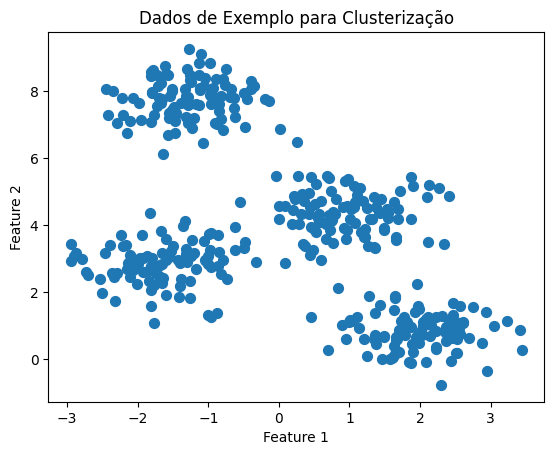

In [13]:
# Visualizando os dados

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dados de Exemplo para Clusterização')
plt.show()

## Aplicando o K-Means

In [14]:
# Para realizar a aplicação do K-Means, precisa-se informar previamente
# alguns hiperparâmetros, tais como  a quantidade de agrupamentos necessários,
# bem como a de iterações que o algoritmo deverá desempenhar em ordem de encontrar
# a formação de grupos distintos, por meio dos centroids.

# Assim, o n_init significa que o algoritmo será executado 10 vezes com diferentes
# centroids iniciais e melhor solução, aquela que apresenta o melhor ajuste,
# será a escolhida.

kmeans = KMeans(n_clusters=4, n_init=10, random_state=SEED)

In [15]:
# Ajustando o modelo aos dados (treinamento)

kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [17]:
# Obtendo os centroides e rótulos dos clusters
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

In [29]:
print(f"Coordenada dos centroides: \n\n{centroides}\n")
print(f"Rotulos dos clusters: \n\n{rotulos}\n")
print(f"Quantidade de rótulos presentes: \n\n{rotulos.size}\n")

Coordenada dos centroides: 

[[-1.61366997  2.84849883]
 [-1.2689694   7.75608144]
 [ 1.95662677  0.83945671]
 [ 0.95041055  4.36874542]]

Rotulos dos clusters: 

[1 0 0 3 0 1 2 3 0 2 1 2 3 0 0 2 0 2 3 0 0 0 1 3 3 1 1 3 3 2 3 3 0 3 0 1 2
 3 2 3 0 1 2 3 2 1 2 2 2 1 1 1 0 1 1 0 3 2 2 0 2 2 2 2 3 0 2 3 0 1 0 3 0 1
 2 0 3 0 1 0 0 3 2 1 3 0 0 3 0 2 0 2 3 0 0 1 3 2 2 2 1 2 3 3 0 1 3 1 2 0 0
 0 3 0 1 2 1 0 1 1 2 0 2 1 3 1 2 2 2 3 1 1 1 0 3 0 1 3 1 0 3 0 0 1 0 2 3 0
 2 0 2 3 2 3 1 0 2 0 0 0 3 0 1 0 0 1 2 2 0 1 1 1 1 2 2 2 3 0 3 1 3 1 0 3 1
 0 1 3 3 1 3 3 1 0 1 1 1 2 2 3 3 0 2 2 1 3 0 1 3 1 3 3 2 2 1 2 3 1 2 1 0 3
 1 0 0 0 2 1 3 1 3 0 3 3 1 2 0 2 3 0 2 3 3 1 2 3 1 3 2 0 0 2 0 3 1 1 3 3 2
 1 3 0 0 0 1 3 3 3 3 3 2 3 3 1 0 2 1 2 2 2 1 2 2 1 1 1 2 3 2 3 2 0 3 2 0 3
 2 2 3 0 1 1 3 1 2 2 3 1 1 2 2 3 1 3 2 3 2 1 0 0 2 0 3 0 0 1 0 1 2 0 1 2 1
 3 0 3 0 2 3 2 1 2 2 2 2 1 2 0 2 0 2 3 1 0 2 2 3 0 0 1 1 1 0 3 2 3 0 2 0 1
 0 3 3 0 1 3 1 1 0 1 0 1 3 3 3 0 1 1 1 1 0 1 3 2 2 3 3 2 0 2]

Quantidade de rótulos pr

Acima observa-se as coordenas existentes para cada centroid de cada cluster (agrupamento presente), assim como os rótulos a que cada elemento pertencem, evidenciando o seu grupo de pertencimento, além da quantidade de rótulos presentes. Nota-se que os rótulos dos clusters se referem ao conjunto de elementos existentes no dataset, por meio da última informação.

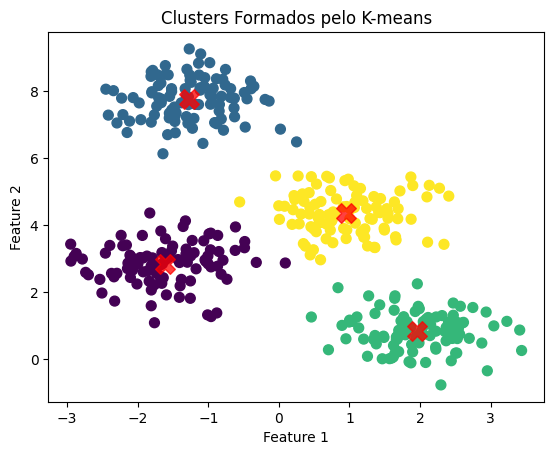

In [18]:
# Visualizando os clusters

plt.scatter(X[:, 0], X[:, 1], c=rotulos, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c='red', alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters Formados pelo K-means')
plt.show()

## Escolhendo a quantidade de clusters (K)

Uma das formas de se encontrar o K ótimo, isto é, a quantidade de grupos ideal para a realização da clusterização utilizando o K-Means é utilizar o método conhecido como método do cotovelo. Por meio dele, é possível observar um ponto de inflexão (cotovelo) no qual a soma dos erros dos quadrados deixa de apresentar uma declividade acentuada.

Desse modo, essa abordagem relaciona-se com a observação da soma dos erros quadráticos, de modo quando a sua redução não for tão acentuada a partir de um ponto, pode-se escolher como quantidade de clusters o ponto no qual a redução passou a ser menos acentuada (cotovelo). Vejamos como implementá-lo.



In [33]:
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) # por meio do atributo '.inertia_' podemos encontrar
                                # a soma dos erros quadráticos.


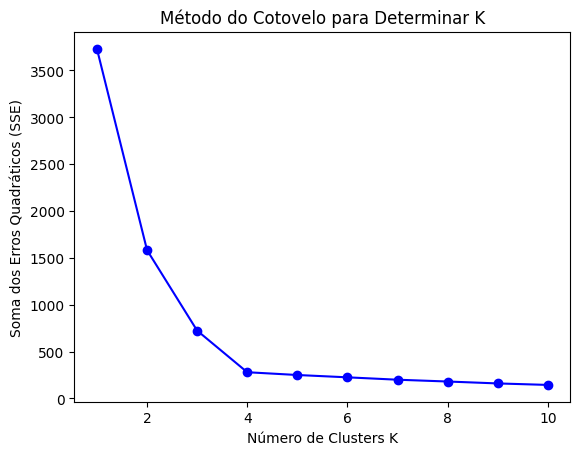

In [34]:
# Visualizando o Método do Cotovelo

plt.plot(k_values, sse, 'bo-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo para Determinar K')
plt.show()

Por meio do gráfico, torna-se mais fácil a compreensão do ponto de inflexão (cotovelo) junto de sua visualização. Nota-se que a partir dele, os agrupamentos subsequentes promovem pouca variação da soma dos erros dos quadráticos, enquanto antes dele essa era acentuada. Assim, escolhe-se justamente o ponto a partir do qual a variação deixou de ser mais acentuada, que aqui é a quantidade de cluster 4.  

## Aplicação da clusterização em cenários reais

A aplicação de tal abordagem é frequentemente encontrado em diversas áreas nas quais busca-se encontrar determinados padrões nos dados junto de grupos, estando presente na esfera econômica, biológica, processamento de imagem e etc. Além disso, pode servir de método por meio do qual elabora-se rótulos para aprendizagem futura, como a segmentação de clientes com base no seu tipo de consumo e intensidade, análise de saúde relacioando faixa etária e presença de comorbidades e etc.